# Agenda :To predict loan eligiblity 

In [1]:
#importing important library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
loan_train=pd.read_csv(r"D:\raw data\loan-train.csv")

In [4]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_train.shape

(614, 13)

In [6]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# data cleaning process

In [9]:
# handling missing values dataset 

In [10]:
#handling missing numearical data 

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

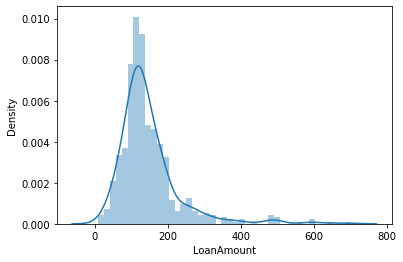

In [11]:
sns.distplot(loan_train['LoanAmount'])

In [12]:
#The data disturbution of loan amount is right skew .so,choose fill with median in missing places.  

In [13]:
loan_train['LoanAmount']=loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median())

In [14]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#handling categorical dataset missing values 
#for categorical columns fill with highest number of occurance (mode)

In [16]:
loan_train[['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Loan_Status']].mode()

,Gender,Married,Dependents,Self_Employed,Loan_Amount_Term,Loan_Status
0,Male,Yes,0,No,360.0,Y


In [17]:
loan_train['Gender']=loan_train['Gender'].fillna(loan_train['Gender'].mode()[0])
loan_train['Dependents']=loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0])
loan_train['Self_Employed']=loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0])
loan_train['Credit_History']=loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0])
loan_train['Loan_Amount_Term']=loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0])
loan_train['Married']=loan_train['Married'].fillna(loan_train['Married'].mode()[0])
loan_train['Loan_Status']=loan_train['Loan_Status'].fillna(loan_train['Loan_Status'].mode()[0])

In [18]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# checking outliers in loan_train data set 

In [19]:
#we only 3 numerical column.rest of are categorical column.so,check for numerical column

In [20]:
#applicant income and coapplicant income given same meaning .so, combine the both column into one column. 

In [21]:
loan_train['income']=loan_train['ApplicantIncome']+loan_train['CoapplicantIncome']

In [22]:
loan_train.drop(['ApplicantIncome'],axis=1,inplace=True)

In [23]:
loan_train.drop(['CoapplicantIncome'],axis=1,inplace=True)

In [24]:
loan_train.drop(['Loan_ID'],axis=1,inplace=True)

In [25]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


{'whiskers': [<matplotlib.lines.Line2D at 0x223cb78d5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x223cb78db80>,
 'boxes': [<matplotlib.lines.Line2D at 0x223cb78d2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x223cb799040>],
 'fliers': [<matplotlib.lines.Line2D at 0x223cb799310>],
 'means': []}

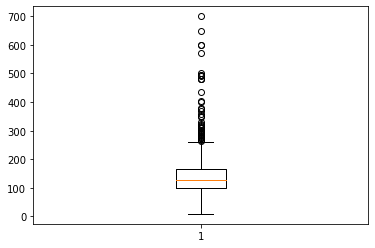

In [26]:
plt.boxplot(loan_train['LoanAmount'])

In [27]:
#capping outliers-for create accurate model
#finding iqr(Inter Quartile Range)
#iqr formula (iqr=q3-q1)
#(q3=Quartile3,q1=Quartile1)

In [28]:
q3 = loan_train['LoanAmount'].quantile(0.75)  
q1 = loan_train['LoanAmount'].quantile(0.25)

In [29]:
iqr=q3-q1

In [30]:
#The above figure indicate  upperlimit contains many outliers.

In [31]:
upperlimit=q3+(iqr*1.5)

In [32]:
upperlimit

261.5

In [33]:
loan_train['LoanAmount'].where(loan_train['LoanAmount'] >q3,q3,'inplace'==True)

0      164.75
1      164.75
2      164.75
3      164.75
4      164.75
        ...  
609    164.75
610    164.75
611    253.00
612    187.00
613    164.75
Name: LoanAmount, Length: 614, dtype: float64

In [34]:
loan_train.LoanAmount.max()

700.0

In [35]:
loan_train['LoanAmount']=loan_train['LoanAmount'].apply(lambda a:a if a<upperlimit else upperlimit)

{'whiskers': [<matplotlib.lines.Line2D at 0x223cb8210d0>,
 'caps': [<matplotlib.lines.Line2D at 0x223cb821520>,
 'boxes': [<matplotlib.lines.Line2D at 0x223cb812d90>],
 'medians': [<matplotlib.lines.Line2D at 0x223cb8219a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x223cb821c70>],
 'means': []}

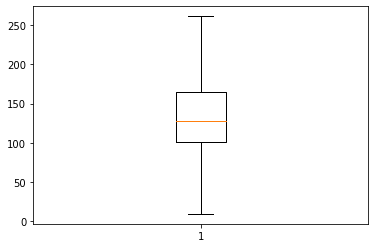

In [36]:
plt.boxplot(loan_train['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

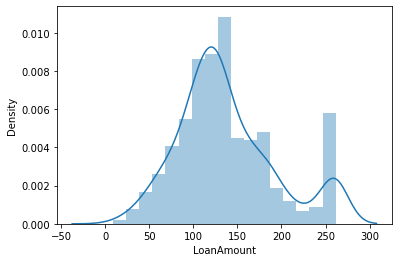

In [37]:
sns.distplot(loan_train['LoanAmount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x223cb902e80>,
 'caps': [<matplotlib.lines.Line2D at 0x223cb913460>,
 'boxes': [<matplotlib.lines.Line2D at 0x223cb902bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x223cb913a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x223cb913cd0>],
 'means': []}

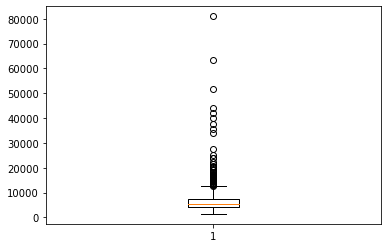

In [38]:
plt.boxplot(loan_train['income'])

In [39]:
q3 = loan_train['income'].quantile(0.75)  
q1 = loan_train['income'].quantile(0.25)

In [40]:
iqr=q3-q1

In [41]:
upperlimit=q3+(iqr*1.5)

In [42]:
upperlimit

12555.375

In [43]:
loan_train['income'].where(loan_train['income'] >q3,q3,'inplace'==True)

0      7521.75
1      7521.75
2      7521.75
3      7521.75
4      7521.75
        ...   
609    7521.75
610    7521.75
611    8312.00
612    7583.00
613    7521.75
Name: income, Length: 614, dtype: float64

In [44]:
loan_train.income.max()

81000.0

In [45]:
loan_train['income']=loan_train['income'].apply(lambda a:a if a<upperlimit else upperlimit)

{'whiskers': [<matplotlib.lines.Line2D at 0x223cb97f8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x223cb97fe20>,
 'boxes': [<matplotlib.lines.Line2D at 0x223cb97f5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x223cb98f400>],
 'fliers': [<matplotlib.lines.Line2D at 0x223cb98f700>],
 'means': []}

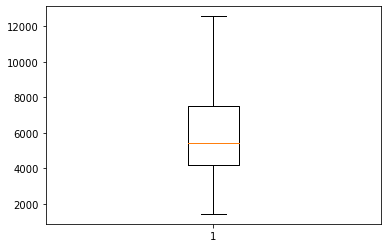

In [46]:
plt.boxplot(loan_train['income'])

<AxesSubplot:xlabel='income', ylabel='Density'>

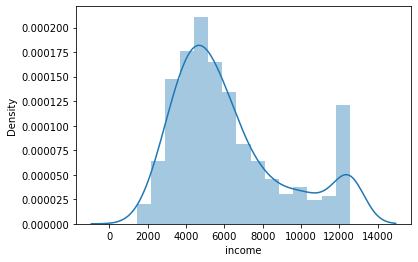

In [47]:
sns.distplot(loan_train['income'])

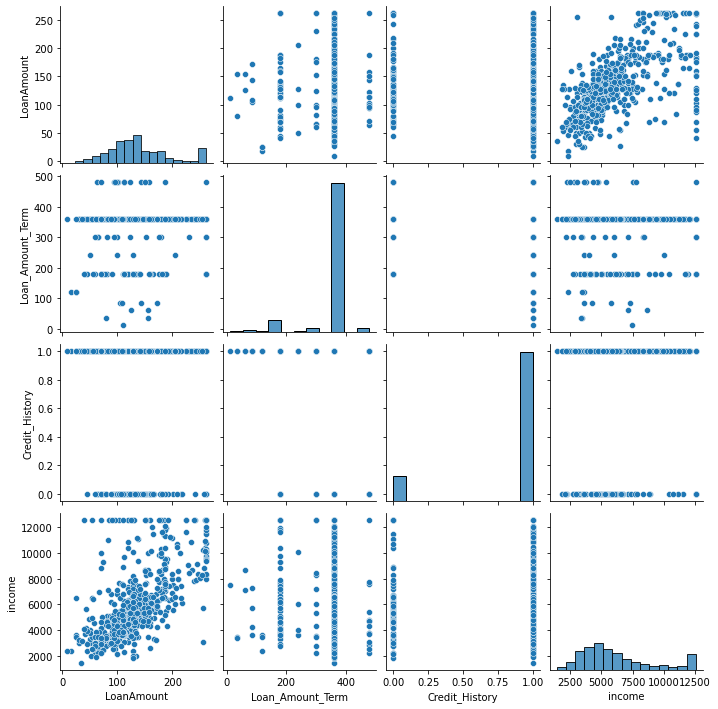

In [48]:
sns.pairplot(loan_train)


# Exploratory Data Analysis(EDA)

In [49]:
#Independent variables vs dependent variable 

In [50]:
data=loan_train.groupby(['Loan_Status','Gender'])['Gender'].count()
data=data.to_frame(name='count').reset_index()
data

,Loan_Status,Gender,count
0,N,Female,37
1,N,Male,155
2,Y,Female,75
3,Y,Male,347


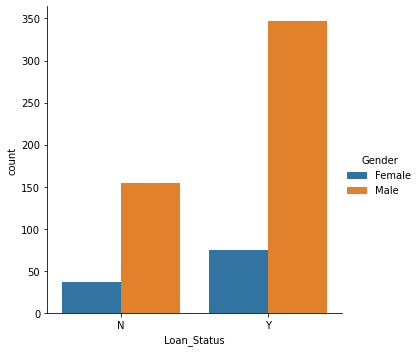

In [51]:
sns.catplot(data=data,x='Loan_Status',y='count',hue='Gender',kind='bar')

In [52]:
# The above figure clearly indicate most number of male  applied for loan as compare as female.
#probability of getting  chances  of loan  for male :female (70%:67%)
#

In [53]:
data=loan_train.groupby(['Loan_Status','Married'])['Married'].count()
data=data.to_frame(name='count').reset_index()
data

,Loan_Status,Married,count
0,N,No,79
1,N,Yes,113
2,Y,No,134
3,Y,Yes,288


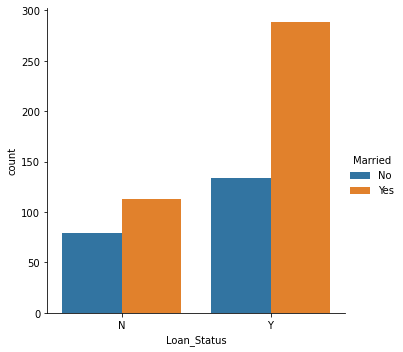

In [54]:
sns.catplot(data=data,x='Loan_Status',y='count',hue='Married',kind='bar')

In [55]:
#The above figure clearly indicate most number of married  applied for loan as compare as unmarried.
#probablity of getting chances loan apply for married and unmarried in ratio of(72%:63%)

In [56]:
data=loan_train.groupby(['Loan_Status','Dependents'])['Dependents'].count()
data=data.to_frame(name='count').reset_index()
data

,Loan_Status,Dependents,count
0,N,0,113
1,N,1,36
2,N,2,25
3,N,3+,18
4,Y,0,247
5,Y,1,66
6,Y,2,76
7,Y,3+,33


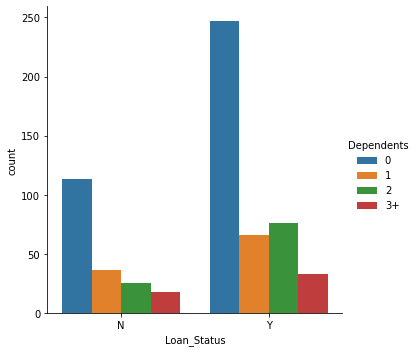

In [57]:
sns.catplot(data=data,x='Loan_Status',y='count',hue='Dependents',kind='bar')

In [58]:
##The above figure clearly indicate most number of non-dependents applied for loan as compare as dependents(1,2,+3)
#probablity of getting chances loan apply for non-dependents and dependents(1,2,+3)in ratio of(67%:65%:75%:60%)

In [59]:
data=loan_train.groupby(['Loan_Status','Education'])['Education'].count()
data=data.to_frame(name='count').reset_index()
data

,Loan_Status,Education,count
0,N,Graduate,140
1,N,Not Graduate,52
2,Y,Graduate,340
3,Y,Not Graduate,82


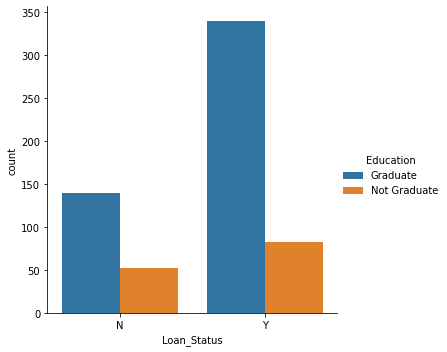

In [60]:
sns.catplot(data=data,x='Loan_Status',y='count',hue='Education',kind='bar')

In [61]:
#The above figure clearly indicate most number of graduate  applied for loan as compare as not graduate.
#probability getting chances the loan to apply for graduate and not graduate in the ratio(71%:61%)

In [62]:
data=loan_train.groupby(['Loan_Status','Self_Employed'])['Self_Employed'].count()
data=data.to_frame(name='count').reset_index()
data

,Loan_Status,Self_Employed,count
0,N,No,166
1,N,Yes,26
2,Y,No,366
3,Y,Yes,56


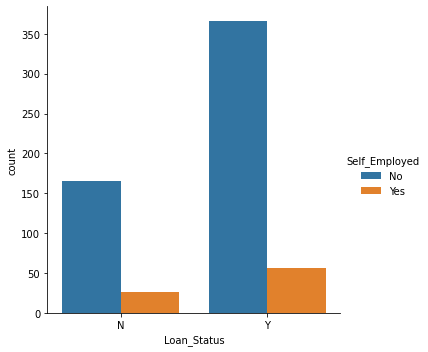

In [63]:
sns.catplot(data=data,x='Loan_Status',y='count',hue='Self_Employed',kind='bar')

In [64]:
#The above figure clearly indicate most number of employed people  applied for loan as compare as self employed.
##probablity of getting chances to loan apply self employed no and yes in ratio of(70%:68%)

In [65]:
data=loan_train.groupby(['Loan_Status','Loan_Amount_Term'])['Loan_Amount_Term'].count()
data=data.to_frame(name='count').reset_index()
data

,Loan_Status,Loan_Amount_Term,count
0,N,36.0,2
1,N,84.0,1
2,N,180.0,15
3,N,240.0,1
4,N,300.0,5
5,N,360.0,159
6,N,480.0,9
7,Y,12.0,1
8,Y,60.0,2
9,Y,84.0,3


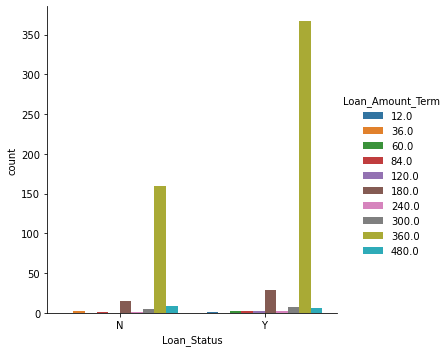

In [66]:
sns.catplot(data=data,x='Loan_Status',y='count',hue='Loan_Amount_Term',kind='bar')

In [67]:
#most of the  people choose  "360 "month time period to repay the loan amount.

In [68]:
data=loan_train.groupby(['Loan_Status','Credit_History'])['Credit_History'].count()
data=data.to_frame(name='count').reset_index()
data

,Loan_Status,Credit_History,count
0,N,0.0,82
1,N,1.0,110
2,Y,0.0,7
3,Y,1.0,415


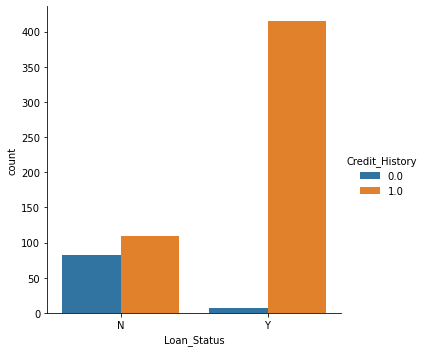

In [69]:
sns.catplot(data=data,x='Loan_Status',y='count',hue='Credit_History',kind='bar')

In [70]:
#Those who are previous credit history most of are eligible  for loan.
#credit history is the most important affecting factor to get loan eligibility.
##probablity of getting chances loan apply having credit history 0 and 1 in ratio of(9%:78%)

In [71]:
data=loan_train.groupby(['Loan_Status','Property_Area'])['Property_Area'].count()
data=data.to_frame(name='count').reset_index()
data

,Loan_Status,Property_Area,count
0,N,Rural,69
1,N,Semiurban,54
2,N,Urban,69
3,Y,Rural,110
4,Y,Semiurban,179
5,Y,Urban,133


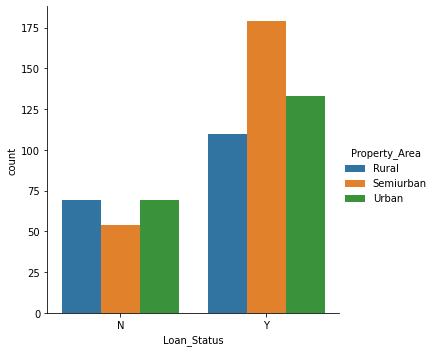

In [72]:
sns.catplot(data=data,x='Loan_Status',y='count',hue='Property_Area',kind='bar')

In [73]:
#most of semiurban proples are applied for loan.
#probablity of getting chances loan apply from rural,semiurban,urban  in ratio of(61%:77%:66%)

# Encoding Process

In [74]:
# categorical text column is converted into numerical by using encoding.here we do nominal(gender,self employed,married,education,loan status) and ordinal(property area) encoding 

In [75]:
loan_train.Gender=loan_train.Gender.map({'Male':1,'Female':0})
loan_train['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [76]:
loan_train.Married=loan_train.Married.map({'Yes':1,'No':0})
loan_train['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [77]:
loan_train.Education=loan_train.Education.map({'Graduate':1,'Not Graduate':0})
loan_train['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [78]:
loan_train.Dependents=loan_train.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
loan_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [79]:
loan_train.Self_Employed=loan_train.Self_Employed.map({'Yes':1,'No':0})
loan_train['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [80]:
loan_train.Property_Area=loan_train.Property_Area.map({'Urban':1,'Semiurban':2,'Rural':0})
loan_train['Property_Area'].value_counts()

2    233
1    202
0    179
Name: Property_Area, dtype: int64

In [81]:
loan_train.Loan_Status=loan_train.Loan_Status.map({'Y':1,'N':0})
loan_train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [82]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income
0,1,0,0,1,0,128.0,360.0,1.0,1,1,5849.0
1,1,1,1,1,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,1,1,66.0,360.0,1.0,1,1,3000.0
3,1,1,0,0,0,120.0,360.0,1.0,1,1,4941.0
4,1,0,0,1,0,141.0,360.0,1.0,1,1,6000.0


In [83]:
#The above table shown clearly after encoding all the variables change text into numerical.

# correlation Matrix

# for feature selection doing heatmap

<AxesSubplot:>

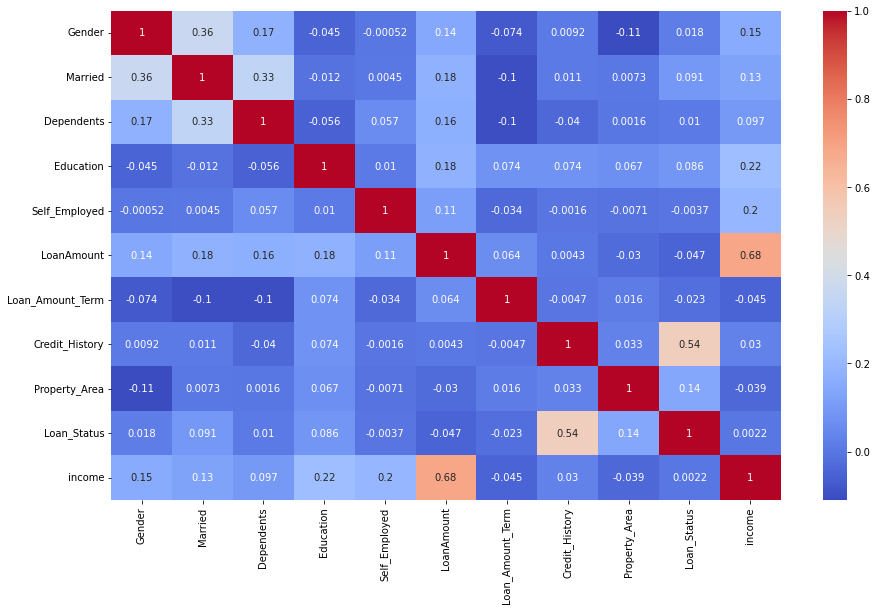

In [84]:
corr=loan_train.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [85]:
#from above heat map credit history(independent variable) highly correlate with the target variable(loan_status).

# splitting the data for training and testing

In [86]:
train_x=loan_train.iloc[:,[0,1,2,3,4,5,7,8,10]]


In [87]:
train_x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,income
0,1,0,0,1,0,128.0,1.0,1,5849.0
1,1,1,1,1,0,128.0,1.0,0,6091.0
2,1,1,0,1,1,66.0,1.0,1,3000.0
3,1,1,0,0,0,120.0,1.0,1,4941.0
4,1,0,0,1,0,141.0,1.0,1,6000.0
...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,71.0,1.0,0,2900.0
610,1,1,3,1,0,40.0,1.0,0,4106.0
611,1,1,1,1,0,253.0,1.0,1,8312.0
612,1,1,2,1,0,187.0,1.0,1,7583.0


In [88]:
train_y=loan_train.iloc[:,[9]]

In [89]:
train_y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# scaling of train_x

In [90]:
scale_x =train_x.iloc[:,[5,8]]

In [91]:
scale_x

,LoanAmount,income
0,128.0,5849.0
1,128.0,6091.0
2,66.0,3000.0
3,120.0,4941.0
4,141.0,6000.0
...,...,...
609,71.0,2900.0
610,40.0,4106.0
611,253.0,8312.0
612,187.0,7583.0


In [92]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [93]:
loan_train_std=std.fit_transform(scale_x)

In [94]:
loan_train_std

array([[-0.16804076, -0.12031624],
       [-0.16804076, -0.03609689],
       [-1.28046152, -1.11180761],
       ...,
       [ 2.07474303,  0.7368418 ],
       [ 0.89055319,  0.48313972],
       [-0.07832941, -0.56090173]])

In [95]:
train_x[['LoanAmount','income']]

,LoanAmount,income
0,128.0,5849.0
1,128.0,6091.0
2,66.0,3000.0
3,120.0,4941.0
4,141.0,6000.0
...,...,...
609,71.0,2900.0
610,40.0,4106.0
611,253.0,8312.0
612,187.0,7583.0


In [96]:
train_x[['LoanAmount','income']]=loan_train_std 

In [97]:
train_x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,income
0,1,0,0,1,0,-0.168041,1.0,1,-0.120316
1,1,1,1,1,0,-0.168041,1.0,0,-0.036097
2,1,1,0,1,1,-1.280462,1.0,1,-1.111808
3,1,1,0,0,0,-0.311579,1.0,1,-0.436313
4,1,0,0,1,0,0.065209,1.0,1,-0.067766
...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-1.190750,1.0,0,-1.146609
610,1,1,3,1,0,-1.746961,1.0,0,-0.726904
611,1,1,1,1,0,2.074743,1.0,1,0.736842
612,1,1,2,1,0,0.890553,1.0,1,0.483140


In [98]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test= train_test_split( train_x, train_y, test_size=0.2, random_state=42)

# model training 

In [99]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X1_train, y1_train)

LogisticRegression()

In [100]:
y1_pred = clf.predict(X1_test)

In [101]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.86%


In [102]:
#svm algorithm

In [103]:
from sklearn import svm
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X1_train,y1_train)
#predict the response
pred = cls.predict(X1_test)

In [104]:
from sklearn import metrics
#accuracy
print("accuracy:", metrics.accuracy_score(y1_test,y_pred=pred))
#precision score
print("precision:", metrics.precision_score(y1_test,y_pred=pred))
#recall score
print("recall" , metrics.recall_score(y1_test,y_pred=pred))
print(metrics.classification_report(y1_test, y_pred=pred))

accuracy: 0.7886178861788617
precision: 0.7596153846153846
recall 0.9875
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [105]:
#Random forest algorithm

In [106]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state =0)
regressor.fit(X1_train,y1_train)

RandomForestRegressor(random_state=0)

In [107]:
regressor.predict(X1_test)

array([0.97, 0.96, 0.87, 0.71, 0.76, 0.93, 0.99, 0.58, 0.37, 0.9 , 0.22,
       1.  , 0.92, 0.53, 0.82, 0.88, 0.79, 0.95, 0.84, 0.72, 0.76, 0.9 ,
       0.86, 0.81, 0.63, 0.7 , 0.61, 0.79, 0.8 , 0.67, 0.5 , 0.68, 0.98,
       0.88, 0.6 , 0.01, 0.95, 0.79, 0.97, 0.29, 0.98, 0.71, 0.9 , 0.89,
       0.55, 0.98, 0.85, 0.  , 0.02, 0.15, 0.54, 0.83, 0.21, 0.76, 0.94,
       0.43, 0.9 , 0.5 , 0.06, 0.7 , 0.07, 0.94, 0.01, 0.52, 0.62, 0.92,
       0.97, 0.84, 0.97, 0.92, 0.01, 0.66, 0.96, 0.93, 0.28, 0.43, 0.72,
       0.29, 0.  , 0.39, 0.63, 0.91, 0.91, 0.59, 0.52, 0.88, 0.91, 0.  ,
       0.95, 0.84, 0.87, 0.  , 0.12, 0.91, 0.9 , 0.91, 0.44, 0.97, 0.6 ,
       0.97, 0.83, 0.85, 0.81, 0.95, 0.89, 0.  , 0.84, 0.01, 0.98, 0.95,
       0.67, 0.02, 0.98, 0.69, 0.34, 0.76, 0.9 , 0.89, 0.64, 0.54, 0.92,
       0.85, 0.81])

In [108]:
regressor.score(X1_train,y1_train)

0.8965390792417285

conclusion:
After the Final Submission of test data, my accuracy score 
In logistic regression was 78.86%,
In support vector machine was 0.7886178861788617,
In Random forest was 0.8965390792417285.
In the model,credit history is the most important affecting factor to get loan eligibility.
Amazingly random forest algorithm worked better than all other models.